# 以“情趣”为关键词的天涯帖子数据分析

#### 小组成员

吴宇伦 15210130087
易凌羽 15210130095
李若楠 15210130066

#### 思路

•	抓取天涯论坛上以情趣为关键词的所有天涯帖子（截至2016年6月）

•	对帖子文本通过提取关键词的方式进行分析。对文本进行分词、统计词频后，通过词云的方式展示

•	与单纯计算词频的衡量方法相比，词与词之间的距离和关系也需要考虑。为此，采用了的测量方法是TextRank，保证测量的准确性

•	抽取了部分词云，将词语重要性分布绘制在了本分析中

•	并按年份分析高频重要性词汇的历年演变，将其绘制在同一张图上

•	采用主题模型对主题进行自动化分析

•	对回帖进行了网络分析

#### 研究发现

•	在天涯杂谈中，与“情趣”有关的帖子，每个帖子的平均点击数是9839.35次，样本方差为5880347058.87.标准差为76683.42，总点击次数为2951806次

•	部分在8万点击量以上，没有10万+的热门帖子。大部分帖子的回复数集中在1000一下，少量帖子的回复数极高

•	会发现与情趣相关的帖子，在2000-2006年不愠不火，在2006年之后开始增长，2009年出现一个高峰，2010年开始回落，2011年跌落至谷底。在2012-2015年期    间，天涯的“情趣”帖子总体呈现繁荣景象，但从15年开始，相关帖子日渐稀少。推测，这与社交平台的繁荣以及监管部门的严管有关

•	基本上，点击数与回复数呈现明显的正相关性，波动保持基本一致。而粉丝数在02年还同以上变量保持一致，在04年，出现一个峰值，与点击数和回复数所代    表的帖子热度五官，推测同外部因素，即当时天涯整站的火热有关。而在10年、13年，10年的峰值，明显出现在点击回帖08年12年15年的后一年，这可能同帖    子的发酵和粉丝的沉淀有关

•	排名前五十的高频重要词汇如下

情趣 情趣用品 情趣内衣 喜欢 转载 中国 生活 旅馆 老婆 文人 遭遇 黄碟 品位 法律 富有 事件 追求 不能 成人 商店 掌柜 领导 日本 干部 店里 事儿 连载 游客 内衣裤 人生 是否 朋友 大陆 女人 探寻 水灾 男人 没有 专区 内裤 警方 突袭 查获 娱乐场所 大量 增加 大家 落下 变为 故事


### 1. 选择一个关键词，抓取数据（帖子列表、作者信息、回帖）

### 1.1 该项目选择的关键词是【情趣】，选择的网站是bbs.tianya.cn

In [1]:
def crawler(page_num, file_name):
    try:
        url = "http://bbs.tianya.cn/list.jsp?item=free&nextid=%d&order=8&k=情趣" % page_num
        content = urllib2.urlopen(url).read() 
        soup = BeautifulSoup(content, "lxml") 
        articles = soup.find_all('tr')
        for i in articles[1:]:
            td = i.find_all('td')
            title = td[0].text.strip()
            title_url = td[0].a['href']
            author = td[1].text
            author_url = td[1].a['href']
            views = td[2].text
            replies = td[3].text
            date = td[4]['title']
            record = title + '\t' + title_url+ '\t' + author + '\t'+ \
                        author_url + '\t' + views+ '\t'  + replies+ '\t'+ date
            with open(file_name,'a') as p: 
                        p.write(record.encode('utf-8')+"\n") 

    except Exception, e:
        print e
        pass

In [2]:
import urllib2
from bs4 import BeautifulSoup

In [3]:
for page_num in range(10):
    print (page_num)
    crawler(page_num, '/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt') 

0
1
2
3
4
5
6
7
8
9


### 1.2 定义帖子列表为函数df，分析帖子列表长度，为列表项目命名

In [4]:
import pandas as pd

df = pd.read_csv('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt', sep = "\t", header=None)
df[:10]

,0,1,2,3,4,5,6
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56
2,跟风八八我在情趣用品公司的打工BH史,/post-free-1500649-1.shtml,哈士奇聪明不二,http://www.tianya.cn/21846971,61463,442,2009-02-06 16:30
3,今天我狠狠的抽了情趣店老板娘一耳光!,/post-free-1534810-1.shtml,sureden,http://www.tianya.cn/22942918,46543,87,2009-04-06 17:54
4,征集:请问有多少人在淘宝上买过情趣用品?,/post-free-1492546-1.shtml,z_highhopes,http://www.tianya.cn/16529900,40746,217,2009-01-16 10:01
5,深圳一女子身穿透视情趣内衣遭围观(组图)(转载),/post-free-2574658-1.shtml,飘忽不定3,http://www.tianya.cn/21382955,30617,203,2012-06-08 14:58
6,男友变态了吗?竟然拿情趣内衣给我穿?,/post-free-3164399-1.shtml,小米妮Mini,http://www.tianya.cn/78749294,29535,84,2013-03-26 23:44
7,我和老婆去情趣店落下的苦果,/post-free-1411201-1.shtml,履带拖拉机,http://www.tianya.cn/7583253,29363,138,2008-08-13 15:08
8,"想开一个卖情趣用品的店,大家帮我想一下起什么店名好呢",/post-free-2664517-1.shtml,那年的那只狐,http://www.tianya.cn/71991108,23149,96,2012-07-31 09:27
9,"你穿什么牌子的内衣裤,你是否喜欢情趣内衣?",/post-free-259531-1.shtml,黄道吉曰教授,http://www.tianya.cn/2603019,17114,248,2005-03-21 15:29


In [5]:
len(df)

150

In [6]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:10]

,title,link,author,author_page,click,reply,time
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56
2,跟风八八我在情趣用品公司的打工BH史,/post-free-1500649-1.shtml,哈士奇聪明不二,http://www.tianya.cn/21846971,61463,442,2009-02-06 16:30
3,今天我狠狠的抽了情趣店老板娘一耳光!,/post-free-1534810-1.shtml,sureden,http://www.tianya.cn/22942918,46543,87,2009-04-06 17:54
4,征集:请问有多少人在淘宝上买过情趣用品?,/post-free-1492546-1.shtml,z_highhopes,http://www.tianya.cn/16529900,40746,217,2009-01-16 10:01
5,深圳一女子身穿透视情趣内衣遭围观(组图)(转载),/post-free-2574658-1.shtml,飘忽不定3,http://www.tianya.cn/21382955,30617,203,2012-06-08 14:58
6,男友变态了吗?竟然拿情趣内衣给我穿?,/post-free-3164399-1.shtml,小米妮Mini,http://www.tianya.cn/78749294,29535,84,2013-03-26 23:44
7,我和老婆去情趣店落下的苦果,/post-free-1411201-1.shtml,履带拖拉机,http://www.tianya.cn/7583253,29363,138,2008-08-13 15:08
8,"想开一个卖情趣用品的店,大家帮我想一下起什么店名好呢",/post-free-2664517-1.shtml,那年的那只狐,http://www.tianya.cn/71991108,23149,96,2012-07-31 09:27
9,"你穿什么牌子的内衣裤,你是否喜欢情趣内衣?",/post-free-259531-1.shtml,黄道吉曰教授,http://www.tianya.cn/2603019,17114,248,2005-03-21 15:29


In [7]:
df['year']=[int(i[:4])  for i in df.time]

In [8]:
df[:2]

,title,link,author,author_page,click,reply,time,year
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14,2008
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56,2009


In [9]:
title_year_dict = {}

for i in set(df.year):
    j = ' '.join(df['title'][df['year']==i])
    title_year_dict[i] = j

In [10]:
print title_year_dict[2015]

不为人知的情趣经济:中国两性用品市场到底有多大? 有男人不喜欢老婆穿情趣内衣睡衣吗?能说说为什么吗? 79年剩女依然想着嫁月薪12000以上身高176以上学历本科以上情... 年轻女孩子是不是不适合卖情趣用品呢 我就是喜欢情趣用品 有错吗? 情趣店主de那些事 卖个情趣用品结果被各种人带着有色眼镜看待!!! 眼见寝室从旅馆变为棋牌室再变为情趣旅馆的肛肠寸断住校生活 屌丝理工男,悲情年华之余,误入情趣 (连载) 建筑师转行卖情趣用品记 男子平安夜砸店专偷情趣用品 路人:欲火太旺(转载) 18万斤"情趣用品"让多少光棍"脸红"? 学生送老师情趣用品的一些情趣分析 写书的古代情趣-有朋友给指点指点呗?! 18万斤情趣用品到底有多少件啊,能为多少人服务啊? 一个"别人的家孩子"是怎么一步一步走向"情趣"市场的? 2015年1月22日(露胸权,不担当,审美情趣) 刘工:中国画家的献媚与情趣 情趣"五禽戏" 大家来聊聊带妹子或者带男人旅行,该带些什么东西好充满情趣? 十美道人:"情趣"小便池的是与非 红字点秋有情趣 【凤凰旅游】一个厕所的隐喻:小空间情趣与大时代精神(转载)


In [12]:
with open('/Users/user/Desktop/data/final_group_homework/tianya_bbs_title_year.txt', 'a') as f:
    for i in set(df.year):
        line = str(i) + '\t'+ title_year_dict[i] 
        f.write(line+ '\n')

In [13]:
len(df.link)

150

### 1.3 定义作者信息函数，抓取作者信息

In [14]:
df.author_page[:5]

0    http://www.tianya.cn/17696881
1    http://www.tianya.cn/15801770
2    http://www.tianya.cn/21846971
3    http://www.tianya.cn/22942918
4    http://www.tianya.cn/16529900
Name: author_page, dtype: object

In [15]:
url = df.author_page[1]
content = urllib2.urlopen(url).read() 
soup1 = BeautifulSoup(content, "lxml") 

In [16]:
def author_crawler(url, file_name):
    try:
        content = urllib2.urlopen(url).read() 
        soup = BeautifulSoup(content, "lxml")
        link_info = soup.find_all('div', {'class', 'link-box'})
        followed_num, fans_num = [i.a.text for i in link_info]
        try:
            activity = soup.find_all('span', {'class', 'subtitle'})
            post_num, reply_num = [j.text[2:] for i in activity[:1] for j in i('a')]
        except:
            post_num, reply_num = 1, 0
        record =  '\t'.join([url, followed_num, fans_num, post_num, reply_num])
        with open(file_name,'a') as p:
                    p.write(record.encode('utf-8')+"\n") 

    except Exception, e:
        print e, url
        record =  '\t'.join([url, 'na', 'na', 'na', 'na'])
        with open(file_name,'a') as p: 
                    p.write(record.encode('utf-8')+"\n") 
        pass

In [17]:
for k, url in enumerate(df.author_page):
    if k % 10==0:
        print k
    author_crawler(url, '/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_author_info1.txt') 

0
need more than 0 values to unpack http://www.tianya.cn/15801770
10
20
30
40
50
sequence item 3: expected string or Unicode, int found http://www.tianya.cn/33194417
60
70
80
90
100
110
sequence item 3: expected string or Unicode, int found http://www.tianya.cn/3849144
120
130
140


In [18]:
len(df.author_page)

150

### 1.4 合并网址，生成完整的url

In [19]:
df.link[0]

'/post-free-1358675-1.shtml'

In [20]:
url = 'http://bbs.tianya.cn' + df.link[2]
url

'http://bbs.tianya.cn/post-free-1500649-1.shtml'

### 1.5 分析网页页面，抓取回帖列表

In [21]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://bbs.tianya.cn/post-news-349068-1.shtml width=1000 height=500></iframe>')

In [22]:
post = urllib2.urlopen(url).read() 
post_soup = BeautifulSoup(post, "lxml") 

In [23]:
print (post_soup.prettify())[:5000]

<!DOCTYPE HTML>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   跟风八八我在情趣用品公司的打工BH史_天涯杂谈_天涯论坛
  </title>
  <meta content="跟风八八我在情趣用品公司的打工BH史　　    07年3月下旬，不小心误入了一家传销公司，对了，宣传一下此公司的行骗手段，大家以后提醒一下家里的老人，千万别以为天上会掉馅饼。　　　　    此公司名新诺，做眼镜的，卖眼镜我记得是500左右一副，然后按月份分期给买主返钱，一共大约是12个月，..." name="description"/>
  <meta content="IE=EmulateIE9" http-equiv="X-UA-Compatible"/>
  <meta content="哈士奇聪明不二" name="author"/>
  <meta content="format=xhtml; url=http://bbs.tianya.cn/m/post-free-1500649-1.shtml" http-equiv="mobile-agent"/>
  <link href="http://static.tianyaui.com/global/ty/TY.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/global/bbs/web/static/css/bbs_article_76461aa.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <link href="http://bbs.tianya.cn/post-free-1500649-2.shtml" rel="next"/>
  <script type="text/javascript">
   var bbsGlobal = {
	isEhomeItem : false,
	is

In [24]:
pa = post_soup.find_all('div', {'class', 'atl-item'})
len(pa)

99

In [25]:
print pa[0]

<div _host="%E5%93%88%E5%A3%AB%E5%A5%87%E8%81%AA%E6%98%8E%E4%B8%8D%E4%BA%8C" class="atl-item host-item">
<div class="atl-content">
<div class="atl-con-hd clearfix">
<div class="atl-con-hd-l"></div>
<div class="atl-con-hd-r"></div>
</div>
<div class="atl-con-bd clearfix">
<div class="bbs-content clearfix">
<br/>　　    07年3月下旬，不小心误入了一家传销公司，对了，宣传一下此公司的行骗手段，大家以后提醒一下家里的老人，千万别以为天上会掉馅饼。<br/>　　<br/>　　    此公司名新诺，做眼镜的，卖眼镜我记得是500左右一副，然后按月份分期给买主返钱，一共大约是12个月，返的钱加起来共6、7百的样子，即你花五百元买一副镜子，一年后你可以多拿一两百元钱。可能你在怀疑这些钱从哪里来，没关系，等钱返给你的时候你就无所谓了，很多人就此开始拉亲朋好友入伙，基本上都手里有闲钱的大爷大妈。<br/>　　    <br/>　　    在公司做了一个月的客服，越发觉得不安。我这人比较现实，天上的馅饼是从来不吃的，几年前开始连路上碰到有丢钱的都不会去捡，彩票也从来不买，对于公司这种干赔不赚的行当觉得无法理解，（当时上面说集资开店）决定走人了。4月末的时候一个朋友说公司缺人，喊我过去面试。前一天她才告知我公司是做情趣用品的，而且休息只有每周一天（现在不是了），基本上就确定要去了。那时我感情不顺，心情低落，这下忙起来可以把闲暇的时间全部填满。至于一个女生合适不合适做这行，我只想了一下就过去了，当时对于我来说，忙起来才是最重要的。<br/>　　<br/>　　<br/>　　    第二天便去面试了，给我面试的是一个三十来岁的中年男人，问了一些诸如学历工作经验之后，小心翼翼的发问：有男朋友吗？我：现在没有。他顿时扭捏起来：呃，由于我们这个行业比较特殊，所以希望有点经验的人来做........我：..........。当时脸一定红了。总之当天就敲定要来公司，他希望我越快越好，但原公司

In [26]:
print pa[1]

<div _host="%E4%B8%80%E5%A4%9C%E7%86%AC%E7%B2%A5" class="atl-item" id="1" js_restime="2009-02-06 16:33:29" js_username="%E4%B8%80%E5%A4%9C%E7%86%AC%E7%B2%A5" replyid="51168646">
<div class="atl-head" id="d63d220ef782dfac2aaaba7c7faae91d">
<div class="atl-head-reply"></div>
<div class="atl-info">
<span>作者：<a class="js-vip-check" href="http://www.tianya.cn/1546184" target="_blank" uid="1546184" uname="一夜熬粥">一夜熬粥</a> </span>
<span>时间：2009-02-06 16:33:29</span>
</div>
</div>
<div class="atl-content">
<div class="atl-con-hd clearfix">
<div class="atl-con-hd-l"></div>
<div class="atl-con-hd-r"></div>
</div>
<div class="atl-con-bd clearfix">
<div class="bbs-content">
							　　处女沙发<br/>
</div>
<div class="atl-reply">
<a author="一夜熬粥" authorid="1546184" class="reportme a-link" href="javascript:void(0);" replyid="51168646" replytime="2009-02-06 16:33:29">举报</a> |
														
							<span>1楼</span> |
							<a class="a-link-2 ir-shang" floor="1" href="javascript:void(0);" title="打赏层主">
							

In [27]:
print pa[89]

<div _host="%E7%9A%93%E6%9C%88chenhaocmd" class="atl-item" id="91" js_restime="2009-02-07 17:15:09" js_username="%E7%9A%93%E6%9C%88chenhaocmd" replyid="51168736">
<div class="atl-head" id="7e76a15cdc3463978a0a2e955fd15d83">
<div class="atl-head-reply"></div>
<div class="atl-info">
<span>作者：<a class="js-vip-check" href="http://www.tianya.cn/21835732" target="_blank" uid="21835732" uname="皓月chenhaocmd">皓月chenhaocmd</a> </span>
<span>时间：2009-02-07 17:15:09</span>
</div>
</div>
<div class="atl-content">
<div class="atl-con-hd clearfix">
<div class="atl-con-hd-l"></div>
<div class="atl-con-hd-r"></div>
</div>
<div class="atl-con-bd clearfix">
<div class="bbs-content">
							　　超强记号！<br/>
</div>
<div class="atl-reply">
<a author="皓月chenhaocmd" authorid="21835732" class="reportme a-link" href="javascript:void(0);" replyid="51168736" replytime="2009-02-07 17:15:09">举报</a> |
														
							<span>91楼</span> |
							<a class="a-link-2 ir-shang" floor="91" href="javascript:void(0);" title=

In [28]:
print pa[0].find('div', {'class', 'bbs-content'}).text.strip()

07年3月下旬，不小心误入了一家传销公司，对了，宣传一下此公司的行骗手段，大家以后提醒一下家里的老人，千万别以为天上会掉馅饼。　　　　    此公司名新诺，做眼镜的，卖眼镜我记得是500左右一副，然后按月份分期给买主返钱，一共大约是12个月，返的钱加起来共6、7百的样子，即你花五百元买一副镜子，一年后你可以多拿一两百元钱。可能你在怀疑这些钱从哪里来，没关系，等钱返给你的时候你就无所谓了，很多人就此开始拉亲朋好友入伙，基本上都手里有闲钱的大爷大妈。　　    　　    在公司做了一个月的客服，越发觉得不安。我这人比较现实，天上的馅饼是从来不吃的，几年前开始连路上碰到有丢钱的都不会去捡，彩票也从来不买，对于公司这种干赔不赚的行当觉得无法理解，（当时上面说集资开店）决定走人了。4月末的时候一个朋友说公司缺人，喊我过去面试。前一天她才告知我公司是做情趣用品的，而且休息只有每周一天（现在不是了），基本上就确定要去了。那时我感情不顺，心情低落，这下忙起来可以把闲暇的时间全部填满。至于一个女生合适不合适做这行，我只想了一下就过去了，当时对于我来说，忙起来才是最重要的。　　　　　　    第二天便去面试了，给我面试的是一个三十来岁的中年男人，问了一些诸如学历工作经验之后，小心翼翼的发问：有男朋友吗？我：现在没有。他顿时扭捏起来：呃，由于我们这个行业比较特殊，所以希望有点经验的人来做........我：..........。当时脸一定红了。总之当天就敲定要来公司，他希望我越快越好，但原公司五月初有个会议，如果我不在的话那边有些事情磨不开，于是决定五一把原公司的工作处理好，长假后去新公司上班。趁着加班办了离职（超级简单）。


In [29]:
print pa[87].find('div', {'class', 'bbs-content'}).text.strip()

迷奸药或者强烈催情药　　有没有卖啊~　　楼主这个工作可不好当。


In [30]:
pa[1].a

<a class="js-vip-check" href="http://www.tianya.cn/1546184" target="_blank" uid="1546184" uname="\u4e00\u591c\u71ac\u7ca5">\u4e00\u591c\u71ac\u7ca5</a>

In [31]:
print pa[0].find('a', class_ = 'reportme a-link')

<a author="哈士奇聪明不二" authorid="21846971" class="reportme a-link" href="javascript:void(0);" replyid="0" replytime="2009-02-06 16:30:00"> 举报</a>


In [32]:
print pa[0].find('a', class_ = 'reportme a-link')['replytime']

2009-02-06 16:30:00


In [33]:
print pa[0].find('a', class_ = 'reportme a-link')['author']

哈士奇聪明不二


In [34]:
for i in pa[:10]:
    p_info = i.find('a', class_ = 'reportme a-link')
    p_time = p_info['replytime']
    p_author_id = p_info['authorid']
    p_author_name = p_info['author']
    p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
    p_content = p_content.replace('\t', '')
    print p_time, '--->', p_author_id, '--->', p_author_name,'--->', p_content, '\n'

2009-02-06 16:30:00 ---> 21846971 ---> 哈士奇聪明不二 ---> 07年3月下旬，不小心误入了一家传销公司，对了，宣传一下此公司的行骗手段，大家以后提醒一下家里的老人，千万别以为天上会掉馅饼。　　　　    此公司名新诺，做眼镜的，卖眼镜我记得是500左右一副，然后按月份分期给买主返钱，一共大约是12个月，返的钱加起来共6、7百的样子，即你花五百元买一副镜子，一年后你可以多拿一两百元钱。可能你在怀疑这些钱从哪里来，没关系，等钱返给你的时候你就无所谓了，很多人就此开始拉亲朋好友入伙，基本上都手里有闲钱的大爷大妈。　　    　　    在公司做了一个月的客服，越发觉得不安。我这人比较现实，天上的馅饼是从来不吃的，几年前开始连路上碰到有丢钱的都不会去捡，彩票也从来不买，对于公司这种干赔不赚的行当觉得无法理解，（当时上面说集资开店）决定走人了。4月末的时候一个朋友说公司缺人，喊我过去面试。前一天她才告知我公司是做情趣用品的，而且休息只有每周一天（现在不是了），基本上就确定要去了。那时我感情不顺，心情低落，这下忙起来可以把闲暇的时间全部填满。至于一个女生合适不合适做这行，我只想了一下就过去了，当时对于我来说，忙起来才是最重要的。　　　　　　    第二天便去面试了，给我面试的是一个三十来岁的中年男人，问了一些诸如学历工作经验之后，小心翼翼的发问：有男朋友吗？我：现在没有。他顿时扭捏起来：呃，由于我们这个行业比较特殊，所以希望有点经验的人来做........我：..........。当时脸一定红了。总之当天就敲定要来公司，他希望我越快越好，但原公司五月初有个会议，如果我不在的话那边有些事情磨不开，于是决定五一把原公司的工作处理好，长假后去新公司上班。趁着加班办了离职（超级简单）。 

2009-02-06 16:33:29 ---> 1546184 ---> 一夜熬粥 ---> 处女沙发 

2009-02-06 16:34:37 ---> 19762572 ---> 0282008 ---> 快快········ 

2009-02-06 16:36:12 ---> 12877453 ---> 尘土飞扬830129 ---> 好帖，留名 

2009-02-06 16:36:50 ---> 21846971 ---> 哈士奇聪明不二 -

In [35]:
post_soup.find('div', {'class', 'atl-pages'})

<div class="atl-pages"><form action="" method="get" onsubmit="return goPage(this,'free',1500649,5);">\n<span>\u4e0a\u9875</span>\n<strong>1</strong>\n<a href="/post-free-1500649-2.shtml">2</a>\n<a href="/post-free-1500649-3.shtml">3</a>\n<a href="/post-free-1500649-4.shtml">4</a>\n<a href="/post-free-1500649-5.shtml">5</a>\n<a class="js-keyboard-next" href="/post-free-1500649-2.shtml">\u4e0b\u9875</a>\n\xa0\u5230<input class="pagetxt" name="page" type="text"/>\u9875\xa0<input class="pagebtn" maxlength="6" name="gopage" type="submit" value="\u786e\u5b9a"/></form></div>

In [36]:
post_pages = post_soup.find('div', {'class', 'atl-pages'})
post_pages = post_pages.form['onsubmit'].split(',')[-1].split(')')[0]
post_pages

'5'

In [37]:
url = 'http://bbs.tianya.cn' + df.link[2]
url_base = ''.join(url.split('-')[:-1]) + '-%d.shtml'
url_base

'http://bbs.tianya.cn/postfree1500649-%d.shtml'

In [38]:
def parsePage(pa):
    records = []
    for i in pa:
        p_info = i.find('a', class_ = 'reportme a-link')
        p_time = p_info['replytime']
        p_author_id = p_info['authorid']
        p_author_name = p_info['author']
        p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
        p_content = p_content.replace('\t', '').replace('\n', '')#.replace(' ', '')
        record = p_time + '\t' + p_author_id+ '\t' + p_author_name + '\t'+ p_content
        records.append(record)
    return records

import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [39]:
url_1 = 'http://bbs.tianya.cn' + df.link[10]
content = urllib2.urlopen(url_1).read() 
post_soup = BeautifulSoup(content, "lxml") 
pa = post_soup.find_all('div', {'class', 'atl-item'})
b = post_soup.find('div', class_= 'atl-pages')
b

<div class="atl-pages host-pages"></div>

In [40]:
url_1 = 'http://bbs.tianya.cn' + df.link[0]
content = urllib2.urlopen(url_1).read() 
post_soup = BeautifulSoup(content, "lxml") 
pa = post_soup.find_all('div', {'class', 'atl-item'})
a = post_soup.find('div', {'class', 'atl-pages'})
a

<div class="atl-pages"><form action="" method="get" onsubmit="return goPage(this,'free',1358675,63);">\n<span>\u4e0a\u9875</span>\n<strong>1</strong>\n<a href="/post-free-1358675-2.shtml">2</a>\n<a href="/post-free-1358675-3.shtml">3</a>\n<a href="/post-free-1358675-4.shtml">4</a>\n\u2026\n<a href="/post-free-1358675-63.shtml">63</a>\n<a class="js-keyboard-next" href="/post-free-1358675-2.shtml">\u4e0b\u9875</a>\n\xa0\u5230<input class="pagetxt" name="page" type="text"/>\u9875\xa0<input class="pagebtn" maxlength="6" name="gopage" type="submit" value="\u786e\u5b9a"/></form></div>

In [41]:
a.form

<form action="" method="get" onsubmit="return goPage(this,'free',1358675,63);">\n<span>\u4e0a\u9875</span>\n<strong>1</strong>\n<a href="/post-free-1358675-2.shtml">2</a>\n<a href="/post-free-1358675-3.shtml">3</a>\n<a href="/post-free-1358675-4.shtml">4</a>\n\u2026\n<a href="/post-free-1358675-63.shtml">63</a>\n<a class="js-keyboard-next" href="/post-free-1358675-2.shtml">\u4e0b\u9875</a>\n\xa0\u5230<input class="pagetxt" name="page" type="text"/>\u9875\xa0<input class="pagebtn" maxlength="6" name="gopage" type="submit" value="\u786e\u5b9a"/></form>

In [42]:
if b.form:
    print 'true'
else:
    print 'false'

false


In [43]:
import random
import time

def crawler(url, file_name):
    try:
        url_1 = 'http://bbs.tianya.cn' + url
        content = urllib2.urlopen(url_1).read() 
        post_soup = BeautifulSoup(content, "lxml") 
        post_form = post_soup.find('div', {'class', 'atl-pages'})
        if post_form.form:
            post_pages = post_form.form['onsubmit'].split(',')[-1].split(')')[0]
            post_pages = int(post_pages)
            url_base = '-'.join(url_1.split('-')[:-1]) + '-%d.shtml'
        else:
            post_pages = 1
        pa = post_soup.find_all('div', {'class', 'atl-item'})
        records = parsePage(pa)
        with open(file_name,'a') as p: 
            for record in records:    
                p.write('1'+ '\t' + url + '\t' + record.encode('utf-8')+"\n") 
        if post_pages > 1:
            for page_num in range(2, post_pages+1):
                time.sleep(random.random())
                flushPrint(page_num)
                url2 =url_base  % page_num
                content = urllib2.urlopen(url2).read() 
                post_soup = BeautifulSoup(content, "lxml") 
                pa = post_soup.find_all('div', {'class', 'atl-item'})
                records = parsePage(pa)
                with open(file_name,'a') as p: 
                    for record in records:    
                        p.write(str(page_num) + '\t' +url + '\t' + record.encode('utf-8')+"\n") 
        else:
            pass
    except Exception, e:
        print e
        pass

In [46]:
for k, link in enumerate(df.link):
    flushPrint(link)
    if k % 10== 0:
        print 'This it the post of : ' + str(k)
    file_name = '/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_network1.txt'
    crawler(link, file_name)

/post-free-1358675-1.shtmlThis it the post of : 0
/post-free-1688240-1.shtmlThis it the post of : 10
/post-free-2615563-1.shtmlThis it the post of : 20
/post-free-5398417-1.shtmlThis it the post of : 30
/post-free-5137667-1.shtmlThis it the post of : 40
/post-free-1833539-1.shtmlThis it the post of : 50
/post-free-3498085-1.shtmlThis it the post of : 60
/post-free-4676923-1.shtmlThis it the post of : 70
/post-free-1866569-1.shtmlThis it the post of : 80
/post-free-2717837-1.shtmlThis it the post of : 90
/post-free-4450915-1.shtmlThis it the post of : 100
/post-free-4080369-1.shtmlThis it the post of : 110
/post-free-1959347-1.shtmlThis it the post of : 120
/post-free-5313467-1.shtmlThis it the post of : 130
/post-free-3569925-1.shtmlThis it the post of : 140
/post-free-4848684-1.shtml

In [47]:
dtt = []
with open('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_network1.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

10393

In [48]:
dt = pd.DataFrame(dtt)
dt[:5]

,0,1,2,3,4,5
0,1,/post-free-1358675-1.shtml,2008-07-07 00:14:00,17696881,拎菜刀,致版主： 鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...
1,1,/post-free-1358675-1.shtml,2008-07-07 00:27:24,15102217,文化认同统一之本,一楼看连载
2,1,/post-free-1358675-1.shtml,2008-07-07 00:27:41,17696881,拎菜刀,<font color=blue><a name=002></a> 2． 就这样上了黄船—...
3,1,/post-free-1358675-1.shtml,2008-07-07 00:28:05,16223044,玩的就是女人,沙发？？？？？？
4,1,/post-free-1358675-1.shtml,2008-07-07 00:35:57,12226058,草发,香烟的事说完了？ 又来情趣店的事了？ 谁再来个卖包子的事。。。。


In [49]:
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-1358675-1.shtml,2008-07-07 00:14:00,17696881,拎菜刀,致版主： 鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...
1,1,/post-free-1358675-1.shtml,2008-07-07 00:27:24,15102217,文化认同统一之本,一楼看连载
2,1,/post-free-1358675-1.shtml,2008-07-07 00:27:41,17696881,拎菜刀,<font color=blue><a name=002></a> 2． 就这样上了黄船—...
3,1,/post-free-1358675-1.shtml,2008-07-07 00:28:05,16223044,玩的就是女人,沙发？？？？？？
4,1,/post-free-1358675-1.shtml,2008-07-07 00:35:57,12226058,草发,香烟的事说完了？ 又来情趣店的事了？ 谁再来个卖包子的事。。。。


In [50]:
dt.reply[:100]

0     致版主：    鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...
1                                                 一楼看连载
2     <font color=blue><a name=002></a>　　2． 就这样上了黄船—...
3                                              沙发？？？？？？
4                    香烟的事说完了？　　又来情趣店的事了？　　谁再来个卖包子的事。。。。
5                                              潜力贴，留爪靠前
6                            不会是我的第一个沙发吧？　　MS有广告的嫌疑哈，呵呵
7                                    下一篇:真真假假催情药儿,明天上午发
8                                        支持楼主，继续发帖。　　留名
9                                              果然有点广告嫌疑
10                    纪实性很强的长篇,商业名词难免,版主和看官谅解。因为真实，所以诱人
11    <font color=blue><a name=002></a>　　　　3、催情药—情趣店...
12                                                   留爪
13                                        很新鲜，留个印子继续关注。
14                                                 撑着看~
15    <font color=blue><a name=004></a>　　3、催情药—情趣店里那...
16                                      难道不适合本版胃口?人气好冷淡
17    4．虚伪的婚内性—情趣店里那些事儿—长篇连载　　　　　　　　 客厅是贵妇,厨房是主妇

In [51]:
len(dt)

10393

### 2. 简单清洗 & 文本分析

### 2.1 清洗出博主的关注数、粉丝数、发帖数和回帖数

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56


In [55]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56
2,跟风八八我在情趣用品公司的打工BH史,/post-free-1500649-1.shtml,哈士奇聪明不二,http://www.tianya.cn/21846971,61463,442,2009-02-06 16:30
3,今天我狠狠的抽了情趣店老板娘一耳光!,/post-free-1534810-1.shtml,sureden,http://www.tianya.cn/22942918,46543,87,2009-04-06 17:54
4,征集:请问有多少人在淘宝上买过情趣用品?,/post-free-1492546-1.shtml,z_highhopes,http://www.tianya.cn/16529900,40746,217,2009-01-16 10:01


In [56]:
da = pd.read_csv('file:///Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_author_info1.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/17696881,1,227,2328,2351
1,http://www.tianya.cn/15801770,na,na,na,na


In [57]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/17696881,1,227,2328,2351
1,http://www.tianya.cn/15801770,na,na,na,na
2,http://www.tianya.cn/21846971,0,1,135,136
3,http://www.tianya.cn/22942918,0,4,50,53
4,http://www.tianya.cn/16529900,0,1,80,89


### 2.2 清洗出帖子的标题、地址、作者、点击数、回复数、发表时间、作者个人主页（包括关注、粉丝、发帖、回帖数）

In [58]:
data = pd.concat([df,da], axis=1)
len(data)

150

In [59]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14,http://www.tianya.cn/17696881,1,227,2328,2351
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56,http://www.tianya.cn/15801770,na,na,na,na
2,跟风八八我在情趣用品公司的打工BH史,/post-free-1500649-1.shtml,哈士奇聪明不二,http://www.tianya.cn/21846971,61463,442,2009-02-06 16:30,http://www.tianya.cn/21846971,0,1,135,136


In [60]:
type(data.time[0])

str

In [61]:
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)

In [62]:
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day
type(data.time[0])

pandas.tslib.Timestamp

In [63]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num,date,month,year,day
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14:00,http://www.tianya.cn/17696881,1,227,2328,2351,2008-07-07,7,2008,7
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56:00,http://www.tianya.cn/15801770,na,na,na,na,2009-04-04,4,2009,4
2,跟风八八我在情趣用品公司的打工BH史,/post-free-1500649-1.shtml,哈士奇聪明不二,http://www.tianya.cn/21846971,61463,442,2009-02-06 16:30:00,http://www.tianya.cn/21846971,0,1,135,136,2009-02-06,2,2009,6


### 2.4 数据描述

In [64]:
import statsmodels.api as sm

In [65]:
'   '.join(dir(sm)) 

'GEE   GLM   GLS   GLSAR   Logit   MNLogit   MixedLM   NegativeBinomial   NominalGEE   OLS   OrdinalGEE   PHReg   Poisson   ProbPlot   Probit   QuantReg   RLM   WLS   __builtins__   __doc__   __file__   __name__   __package__   add_constant   categorical   cov_struct   datasets   distributions   emplike   families   formula   genmod   graphics   iolib   load   nonparametric   qqline   qqplot   qqplot_2samples   regression   robust   show_versions   stats   test   tools   tsa   version   webdoc'

In [66]:
'   '.join(dir(sm.stats))

'CompareCox   CompareJ   CompareMeans   DescrStatsW   Describe   FTestAnovaPower   FTestPower   GofChisquarePower   HetGoldfeldQuandt   NormalIndPower   Runs   TTestIndPower   TTestPower   __builtins__   __doc__   __file__   __name__   __package__   acorr_breush_godfrey   acorr_ljungbox   anova_lm   binom_test   binom_test_reject_interval   binom_tost   binom_tost_reject_interval   breaks_cusumolsresid   breaks_hansen   chisquare_effectsize   cochrans_q   compare_cox   compare_j   corr_clipped   corr_nearest   cov_cluster   cov_cluster_2groups   cov_hac   cov_hc0   cov_hc1   cov_hc2   cov_hc3   cov_nearest   cov_nw_panel   cov_white_simple   diagnostic   durbin_watson   fdrcorrection   fdrcorrection_twostage   gof   gof_chisquare_discrete   het_arch   het_breushpagan   het_goldfeldquandt   het_white   jarque_bera   lillifors   linear_harvey_collier   linear_lm   linear_rainbow   mcnemar   moment_helpers   multicomp   multipletests   normal_ad   omni_normtest   power_binom_tost   power_

In [67]:
data.describe()

,click,reply,month,year,day
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,9897.546667,71.173333,6.720000,2011.826667,15.220000
std,77129.223890,522.081852,3.454634,3.193422,8.570959
min,18.000000,0.000000,1.000000,2000.000000,1.000000
25%,93.250000,0.000000,3.000000,2010.000000,8.000000
50%,256.500000,3.000000,7.000000,2013.000000,16.000000
75%,1457.250000,13.000000,10.000000,2014.000000,22.000000
max,938472.000000,6301.000000,12.000000,2016.000000,31.000000


In [68]:
import numpy as np

np.mean(data.click), np.std(data.click), np.sum(data.click)

(9897.546666666667, 76871.69654721969, 1484632)

### 不加权的变量

In [69]:
d1 = sm.stats.DescrStatsW(data.click, weights=[1 for i in data.click])
d1.mean, d1.var, d1.std, d1.sum

(9897.5466666666671, 5909257730.047823, 76871.696547219661, 1484632.0)

### 加权的变量

In [70]:
d1 = sm.stats.DescrStatsW(data.click, weights=data.reply)
d1.mean, d1.var, d1.std, d1.sum

(565728.59010865493, 200437956441.19843, 447702.9779230851, 6039718428.0)

### 在天涯杂谈中，与“情趣”有关的帖子，每个帖子的平均点击数是9839.35次，样本方差为5880347058.87.标准差为76683.42，总点击次数为2951806次。

In [71]:
np.median(data.click)

256.5

### 帖子点击排行榜的中位数为255，相对偏低

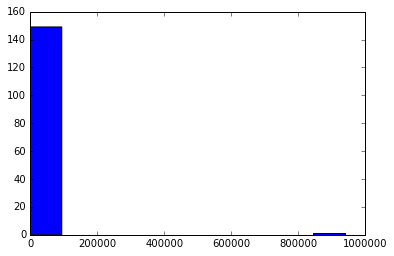

In [72]:
plt.hist(data.click)
plt.show()

#### 以上为点击数，文章普遍集中在100000点击量一下，部分在8万点击量以上，没有10万+的热门帖子。

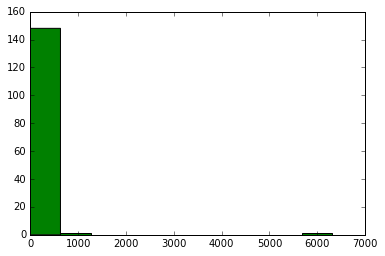

In [73]:
plt.hist(data.reply, color = 'green')
plt.show()

### 大部分帖子的回复数集中在1000一下，少量帖子的回复数极高

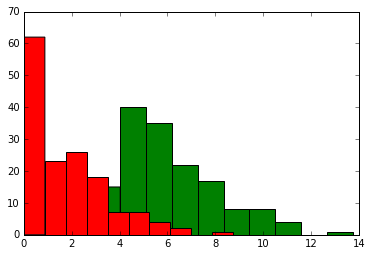

In [74]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

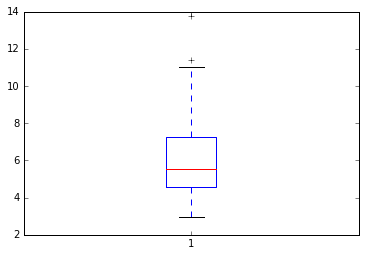

In [75]:
plt.boxplot([np.log(data.click+1)])
plt.show()

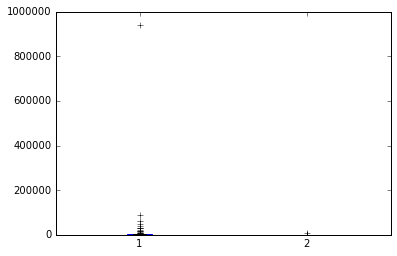

In [76]:
plt.boxplot([data.click, data.reply])
plt.show()

In [77]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [78]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

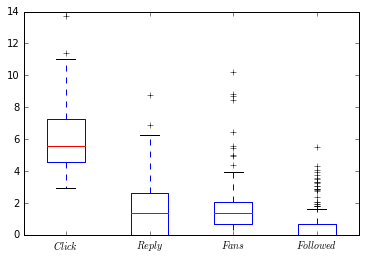

In [79]:
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

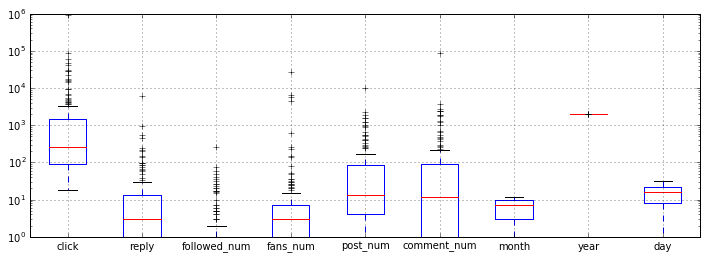

In [80]:
fig = plt.figure(figsize=(12,4))
data.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

In [81]:
'   '.join(dir(data))

'T   _AXIS_ALIASES   _AXIS_IALIASES   _AXIS_LEN   _AXIS_NAMES   _AXIS_NUMBERS   _AXIS_ORDERS   _AXIS_REVERSED   _AXIS_SLICEMAP   __abs__   __add__   __and__   __array__   __array_wrap__   __bool__   __bytes__   __class__   __contains__   __delattr__   __delitem__   __dict__   __dir__   __div__   __doc__   __eq__   __finalize__   __floordiv__   __format__   __ge__   __getattr__   __getattribute__   __getitem__   __getstate__   __gt__   __hash__   __iadd__   __idiv__   __imul__   __init__   __invert__   __ipow__   __isub__   __iter__   __itruediv__   __le__   __len__   __lt__   __mod__   __module__   __mul__   __ne__   __neg__   __new__   __nonzero__   __or__   __pow__   __radd__   __rand__   __rdiv__   __reduce__   __reduce_ex__   __repr__   __rfloordiv__   __rmod__   __rmul__   __ror__   __round__   __rpow__   __rsub__   __rtruediv__   __rxor__   __setattr__   __setitem__   __setstate__   __sizeof__   __str__   __sub__   __subclasshook__   __truediv__   __unicode__   __weakref__   __xo

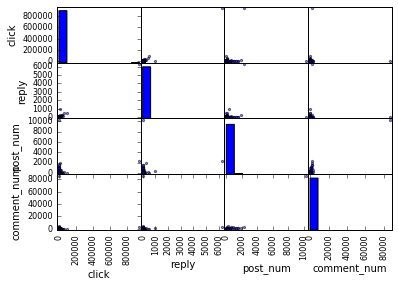

In [82]:
from pandas.tools import plotting
plotting.scatter_matrix(data[['click', 'reply', 'post_num','comment_num']]) 
plt.show()

### 该图呈现的是以情趣为关键字的天涯帖子，在点击数、回复数、发帖数、评论数的对比图。明显发现点击数＞回复数＞发帖数＞评论数。

In [83]:
'  '.join(dir(plotting))

'AbstractMethodError  Appender  AreaPlot  BarPlot  BarhPlot  BasePlotMethods  BoxPlot  FramePlotMethods  HexBinPlot  HistPlot  Index  KdePlot  LinePlot  LooseVersion  MPLPlot  MultiIndex  PandasObject  PeriodIndex  PiePlot  PlanePlot  ScatterPlot  Series  SeriesPlotMethods  _Options  __builtins__  __doc__  __file__  __name__  __package__  _all_kinds  _common_kinds  _dataframe_kinds  _flatten  _gca  _gcf  _get_all_lines  _get_layout  _get_marker_compat  _get_standard_colors  _get_standard_kind  _get_xlim  _grouped_plot  _grouped_plot_by_column  _handle_shared_axes  _klasses  _mpl_ge_1_3_1  _mpl_ge_1_4_0  _mpl_ge_1_5_0  _mpl_le_1_2_1  _plot  _plot_klass  _remove_labels_from_axis  _series_kinds  _set_ticks_props  _shared_doc_df_kwargs  _shared_doc_kwargs  _shared_doc_series_kwargs  _shared_docs  _subplots  andrews_curves  autocorrelation_plot  bootstrap_plot  boxplot  boxplot_frame_groupby  cache_readonly  ceil  colors  com  compat  contextmanager  conv  cycler  deprecate_kwarg  df_ax  df

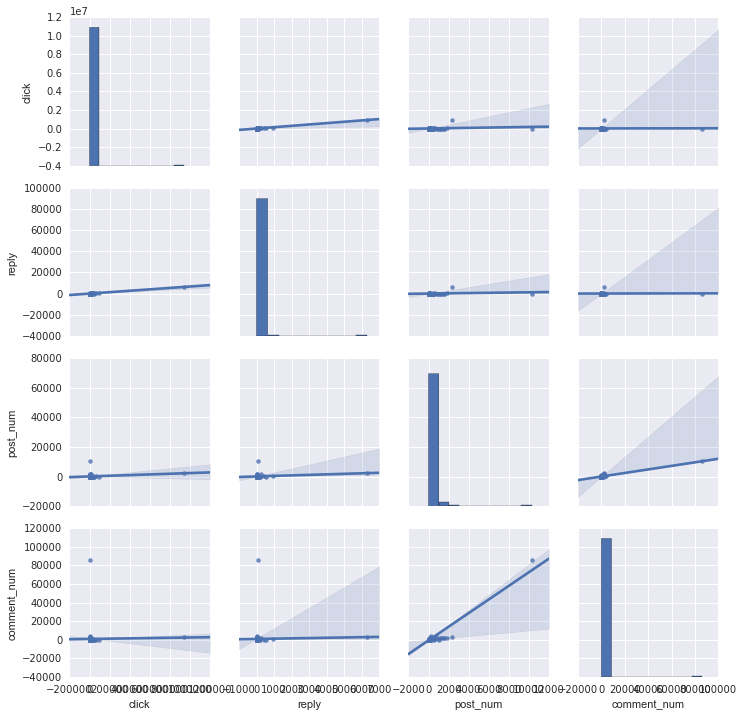

In [84]:
import seaborn # conda install seaborn
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num'],
                  kind='reg') 

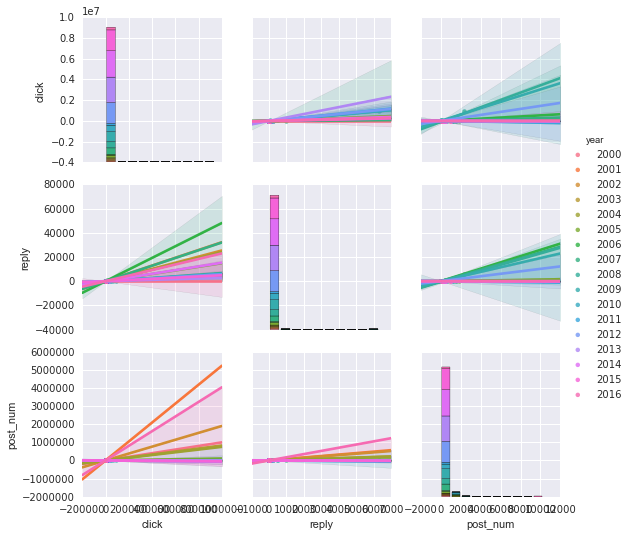

In [85]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

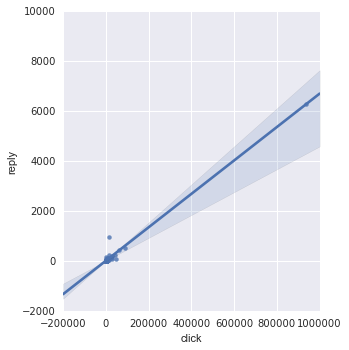

In [86]:
seaborn.lmplot(y='reply', x='click', data=data)  

### 我们创建了多个漂亮复杂的统计图，其中包含拥有置信区间的最拟合回归直线以及相关系数。

In [87]:
data.year.value_counts()

2014    29
2013    28
2012    23
2015    23
2009    11
2008     8
2007     7
2010     7
2005     3
2016     3
2011     2
2006     1
2004     1
2003     1
2002     1
2001     1
2000     1
Name: year, dtype: int64

In [88]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,year
2000,1
2001,1
2002,1
2003,1
2004,1
2005,3
2006,1
2007,7
2008,8
2009,11


In [89]:
dd.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64')

In [90]:
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date_str

['2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01']

In [91]:
dd_date = pd.to_datetime(dd_date_str)
dd_date

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

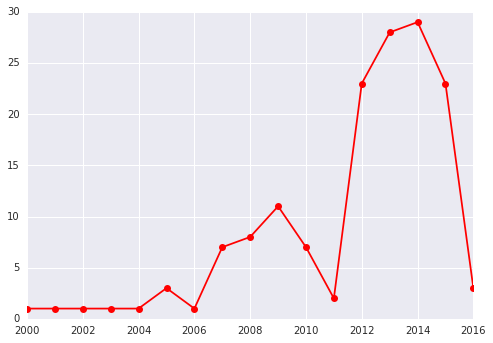

In [92]:
plt.plot(dd_date, dd.year, 'r-o')
plt.show()

### 各年发帖数的折线图。通过该图可以发现，该类帖子出现了三个峰值，其中以12年到15年的发帖量为最。

In [93]:
ds = dd.cumsum()
ds

,year
2000,1
2001,2
2002,3
2003,4
2004,5
2005,8
2006,9
2007,16
2008,24
2009,35


In [94]:
ds_date_str = map(lambda x: str(x) +'-01-01', ds.index)
ds_date_str

['2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01']

In [95]:
ds_date = pd.to_datetime(ds_date_str)
ds_date

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

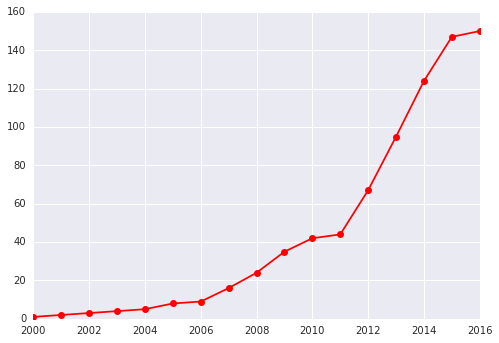

In [96]:
plt.plot(ds_date, ds.year, 'r-o')
plt.show()

In [1]:
### 各年累计发帖数折线图。到2016年那位置，但可以发现，从2015年开始，有一个明显减少的趋势。尽管这种情况在2011年同样发生过。

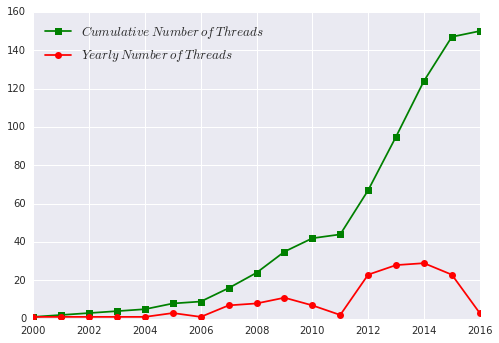

In [97]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds_date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd_date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

### 根据两个图，会发现与情趣相关的帖子，在2000-2006年不愠不火，在2006年之后开始增长，2009年出现一个高峰，2010年开始回落，2011年跌落至谷底。在2012-2015年期间，天涯的“情趣”帖子总体呈现繁荣景象，但从15年开始，相关帖子日渐稀少。推测，这与社交平台的繁荣以及监管部门的严管有关。



In [98]:
dg = data.groupby('year').sum()
dg

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2000,21,0,5,9,21,80,5,16
2001,31,1,1,20,162,218,11,3
2002,512,13,26,49,973,1029,10,29
2003,125,3,0,9,103,124,11,2
2004,2082,50,17,80,1561,1949,10,20
2005,18727,256,6,37,2002,2115,15,62
2006,3015,145,0,25,56,60,3,5
2007,37927,1061,0,16,603,741,37,119
2008,996287,6715,3,272,5059,5264,54,75


In [99]:
dgs = dg.cumsum()
dgs

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2000,21,0,5,9,21,80,5,16
2001,52,1,6,29,183,298,16,19
2002,564,14,32,78,1156,1327,26,48
2003,689,17,32,87,1259,1451,37,50
2004,2771,67,49,167,2820,3400,47,70
2005,21498,323,55,204,4822,5515,62,132
2006,24513,468,55,229,4878,5575,65,137
2007,62440,1529,55,245,5481,6316,102,256
2008,1058727,8244,58,517,10540,11580,156,331


In [100]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

dg.date = getDate(dg)

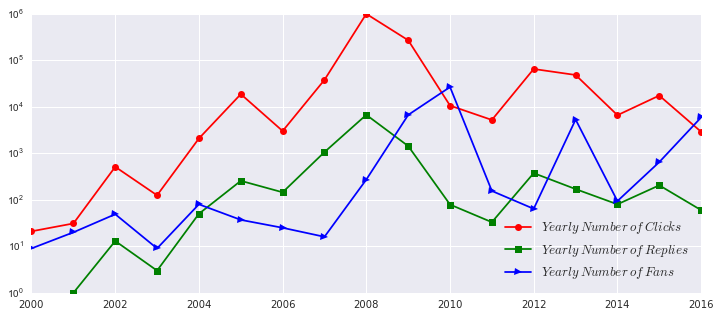

In [101]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.plot(dg.date, dg.fans_num, 'b->', label = '$Yearly\:Number\:of\:Fans$')

plt.yscale('log')

plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

### 该图呈现的是每年的点击综述、回复数、发帖人粉丝数。通过该图可以发现，基本上，点击数与回复数呈现明显的正相关性，波动保持基本一致。而粉丝数在02年还同以上变量保持一致，在04年，出现一个峰值，与点击数和回复数所代表的帖子热度五官，推测同外部因素，即当时天涯整站的火热有关。而在10年、13年，10年的峰值，明显出现在点击回帖08年12年15年的后一年，这可能同帖子的发酵和粉丝的沉淀有关。

In [102]:
data.groupby('year')['click'].sum()

year
2000        21
2001        31
2002       512
2003       125
2004      2082
2005     18727
2006      3015
2007     37927
2008    996287
2009    269725
2010     10615
2011      5217
2012     65055
2013     48341
2014      6603
2015     17443
2016      2906
Name: click, dtype: int64

In [103]:
data.groupby('year')['click'].mean()

year
2000        21.000000
2001        31.000000
2002       512.000000
2003       125.000000
2004      2082.000000
2005      6242.333333
2006      3015.000000
2007      5418.142857
2008    124535.875000
2009     24520.454545
2010      1516.428571
2011      2608.500000
2012      2828.478261
2013      1726.464286
2014       227.689655
2015       758.391304
2016       968.666667
Name: click, dtype: float64

In [111]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [112]:
df['repost'] = repost

In [113]:
df.groupby('repost').sum()

,click,reply
repost,,
0,1449294,10447
1,35338,229


In [114]:
df['click'][df['repost']==0][:5]

0    938472
1     89462
2     61463
3     46543
4     40746
Name: click, dtype: int64

In [115]:
df['click'][df['repost']==1][:5]

5     30617
39     1213
51      612
66      388
72      275
Name: click, dtype: int64

In [117]:
from scipy import stats
stats.ttest_ind(df.click, df.repost)

Ttest_indResult(statistic=1.5716198236705607, pvalue=0.11709985980049215)

### 该部分证明，点击数与回复数的pvalue为0.02688 小于0.05,说明帖子的点击数与回复数具有显著相关性。

In [119]:
sm.stats.ttest_ind(df.click, df.reply) # statistic pvalue小于0.05有显著相关性 自由度

(1.5603067215810627, 0.11974874322375777, 298.0)

In [120]:
print np.corrcoef(df.click, df.reply) # correlation

[[ 1.          0.98902561]
 [ 0.98902561  1.        ]]


In [122]:
df.corr()

,click,reply,repost
click,1.000000,0.989026,-0.046287
reply,0.989026,1.000000,-0.050066
repost,-0.046287,-0.050066,1.000000


### 计算相关系数

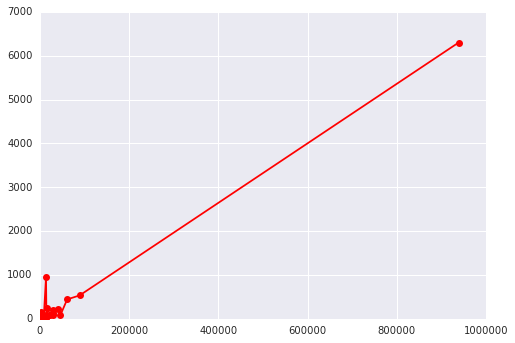

In [123]:

plt.plot(df.click, df.reply, 'r-o')
plt.show()

### 利用图表呈现点击数与回复数的相关度。

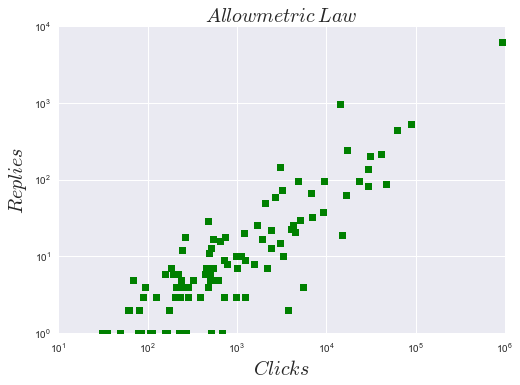

In [124]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

### 点击数与回复数的散点图

In [125]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf # regression

### 回归分析

In [126]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sun, 19 Jun 2016   Prob (F-statistic):           1.10e-49
Time:                        12:58:37   Log-Likelihood:                -176.30
No. Observations:                 150   AIC:                             360.6
Df Residuals:                     146   BIC:                             372.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

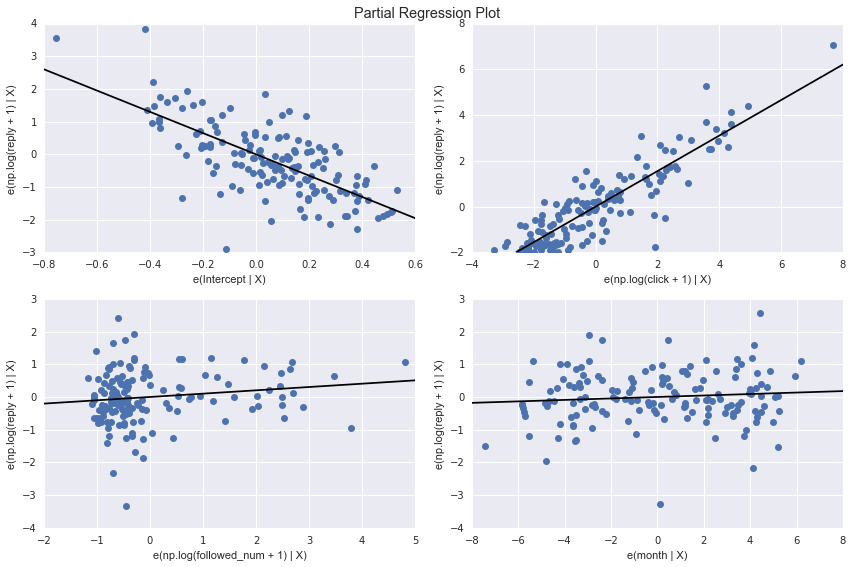

In [127]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()

### R-squared为0.794，靠近1，Adj. R-squared值为0.792，靠近0.794。可以判断该模型的拟合度较好。
### P>|t|值表明回归结果较显著。
### 以上利用plot函数绘制的【偏回归图】，图像高度为8，宽度为12，标示假设在其他所有变量不变的情况下，某一个自变量变化引起因变量变化的比率。

In [129]:
import pandas as pd

df = pd.read_csv('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2] # 线性分析

,title,link,author,author_page,click,reply,time
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56


In [130]:
def randomSplit(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [151]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

import sklearn
print sklearn.__version__

0.17.1


In [152]:
import numpy as np
data_X = df.reply
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), 
                                                                   np.log(df.reply+1), 20)
regr = linear_model.LinearRegression()
regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.79


/Users/user/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [153]:
y_true, y_pred = data_y_test, regr.predict(data_X_test)

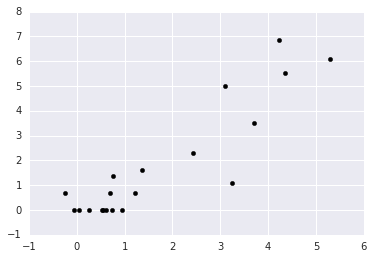

In [154]:
plt.scatter(y_pred, y_true,  color='black')
plt.show()

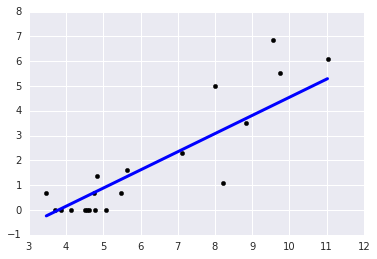

In [155]:
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue', linewidth=3)
plt.show()

In [156]:
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ 0.73193722]


In [157]:
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 1.06


In [158]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [159]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(Xs_train, y_train)
print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.58


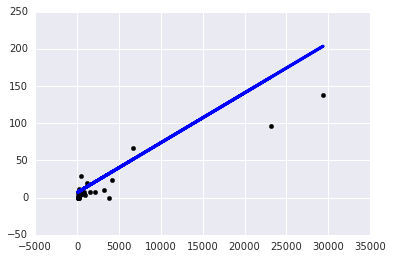

In [160]:
plt.scatter(Xs_test, y_test,  color='black')
plt.plot(Xs_test, regr.predict(Xs_test), color='blue', linewidth=3)
plt.show()

In [161]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 3)
scores.mean()  

-14.990438916515854

In [162]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 4)
scores.mean()  

-7.7230227209167523

### 使用sklearn做logistic回归

In [163]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0) # 使用sklearn做logistic回归

In [164]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:3]

[[938472, 6301], [89462, 534], [61463, 442]]

In [165]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model = LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.84666666666666668

### 方差分析得分为0.87

In [166]:
def randomSplitLogistic(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [167]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
log_regr = LogisticRegression()
log_regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 1.00


In [168]:
y_true, y_pred = data_y_test, log_regr.predict(data_X_test)

In [169]:
y_true, y_pred

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [170]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        20



In [171]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.2, random_state=42)

In [172]:
log_regr = LogisticRegression()
log_regr.fit(Xs_train, y_train)
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.90


In [173]:
print('Logistic score for test set: %f' % log_regr.score(Xs_test, y_test))
print('Logistic score for training set: %f' % log_regr.score(Xs_train, y_train))
y_true, y_pred = y_test, log_regr.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 0.900000
Logistic score for training set: 0.833333
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        27
          1       0.00      0.00      0.00         3

avg / total       0.81      0.90      0.85        30



/Users/user/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [174]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.84676003734827265

In [175]:
logre = LogisticRegression()
data_X_scale = scale(data_X)
scores = cross_val_score(logre, data_X_scale, df.repost, cv = 3)
scores.mean()  

0.84022408963585438

In [176]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(df.click, df.reply, 20)
model.fit(data_X_train, data_y_train)

predicted= model.predict(data_X_test)
print predicted # cross-validation 

[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [177]:
model.score(data_X_test, data_y_test)

0.40000000000000002

In [180]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [181]:
from sklearn.cross_validation import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, [[c] for c in df.click], df.reply, cv = 5)
scores.mean()   

/Users/user/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.27956941534163271

In [183]:
with open('/Users/user/Desktop/data/final_group_homework/tianya_bbs_title_year.txt', 'r') as f:
    reports = f.readlines() # 文本挖掘

In [184]:
len(reports)

17

In [185]:
title_dict = {}
for i in reports:
    year = i[:4]
    title = i[4:]
    title_dict[year]=title

In [189]:
filename = '/Users/user/Desktop/data/final_group_homework/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [198]:
from wordcloud import WordCloud

In [199]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/user/Desktop/data/final_group_homework/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

In [200]:
def plotByYear(txt, year):
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, year) 

In [201]:
import jieba

###  以下是各个年份的词云图。前几年由于内容较少，所以词云较少。

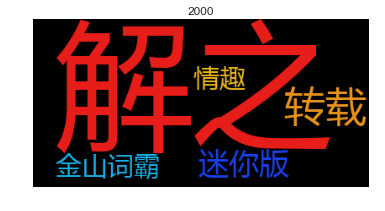

In [204]:
plotByYear(title_dict['2000'], '2000')

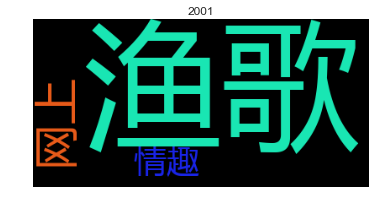

In [205]:
plotByYear(title_dict['2001'], '2001')

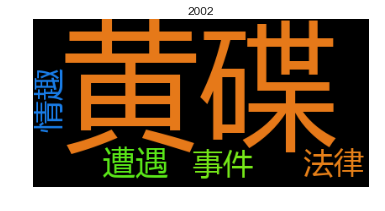

In [206]:
plotByYear(title_dict['2002'], '2002')

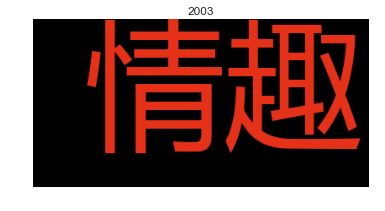

In [207]:
plotByYear(title_dict['2003'], '2003')

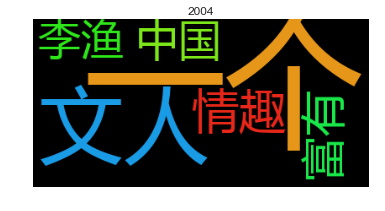

In [208]:
plotByYear(title_dict['2004'], '2004')

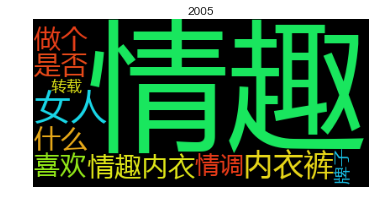

In [209]:
plotByYear(title_dict['2005'], '2005')

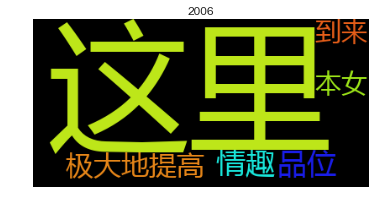

In [210]:
plotByYear(title_dict['2006'], '2006')

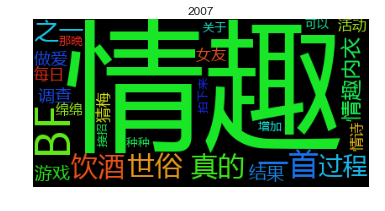

In [211]:
plotByYear(title_dict['2007'], '2007')

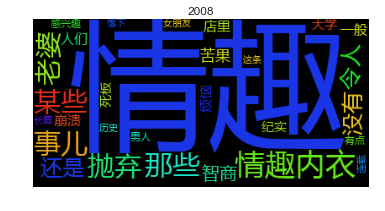

In [202]:
plotByYear(title_dict['2008'], '2008')

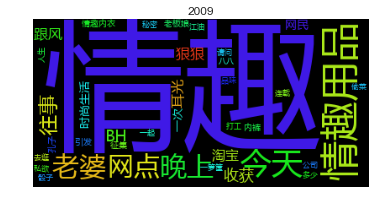

In [203]:
plotByYear(title_dict['2009'], '2009')

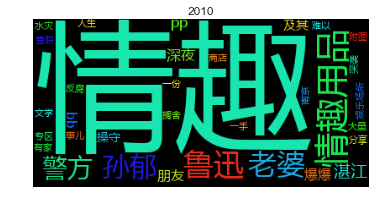

In [212]:
plotByYear(title_dict['2010'], '2010')

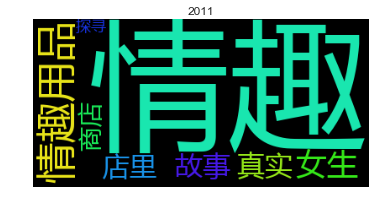

In [213]:
plotByYear(title_dict['2011'], '2011')

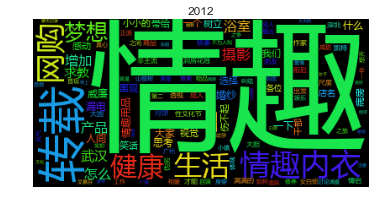

In [214]:
plotByYear(title_dict['2012'], '2012')

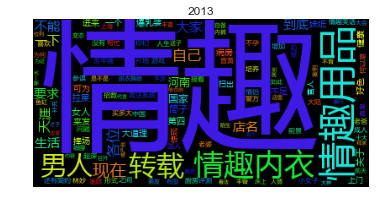

In [215]:
plotByYear(title_dict['2013'], '2013')

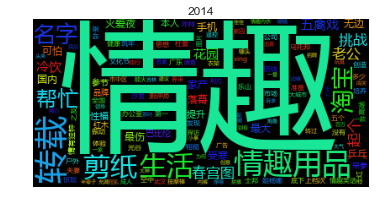

In [216]:
plotByYear(title_dict['2014'], '2014')

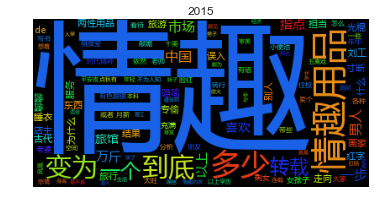

In [217]:
plotByYear(title_dict['2015'], '2015')

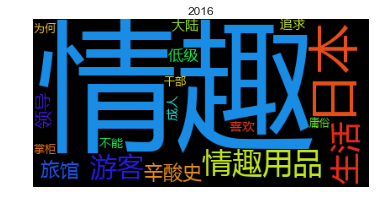

In [218]:
plotByYear(title_dict['2016'], '2016')

# 词向量的时间序列

In [219]:
import jieba.analyse

wordset = []
for txt in reports:
    top20= jieba.analyse.textrank(txt, topK=200, withWeight=False)
    for w in top20:
        if w not in wordset:
            wordset.append(w)

In [220]:
len(wordset)

333

In [221]:
print ' '.join(wordset)

喜欢 情趣 旅馆 追求 掌柜 日本 领导 干部 不能 成人 游客 生活 情趣用品 大陆 遭遇 黄碟 法律 事件 文人 富有 中国 内衣裤 是否 情趣内衣 转载 女人 牌子 情调 品位 活动 过程 拍下来 结果 世俗 做爱 游戏 增加 女友 情诗 饮酒 调查 接招 落下 事儿 死板 女朋友 条路 智商 老婆 人们 有点 没有 大学 感兴趣 连载 苦果 崩溃 店里 历史 纪实 抛弃 男人 收获 耳光 品味 秘密 骰子 往事 引发 征集 内裤 去逛 江油 网点 打工 公司 跟风 老板娘 私欲 网民 请问 上买 人生 水灾 专区 突袭 查获 娱乐场所 大量 朋友 商店 附图 爆爆 警方 湛江 文学 反腐 分享 操守 搁舍 南京 探寻 故事 网购 婚纱 摄影 纠结 实拍 透视 身穿 性文化节 梦想 工作 播出 试孕 思考 洞房 山楂树 正派 选择 医院 武汉 讨论 文化 修养 思想 出发 广州 女子 病房 围观 洞房花烛 一篮 商品 尺度 物品 首现 带给 带上 产品 浴室 相爱 才能 感动 经济 皇帝 树立 国人 视觉 深圳 人间 笑话 准备 爱情 组图 大胆 轶事 女白领 体味 审美 东阳 想开 月饼 娱乐 注意 情侣 作家 伪劣 风气 大国 非主流 大家 天涯 惊现 大神 不育 大会 要求 培养 形式 男友 进来 官人 维也纳 变态 屌丝 内容 参谋 筒子 拉屎 老爸 床上 位列 好色 国家 手游 帮忙 自备 拜求 不孕 前景 召开 捧场 法官 上门 河南 扫出 大道理 青果 看法 发牢骚 爆乳 招数 评测 问题 可为 脱衣舞娘 案例 厨房 上海 成产 还有 陌生 店名 细腰 鱼缸 才子 人情 妹纸 补充 振动 光谷 提升 遥控 落幕 市中区 乐山 全国 高端 转行 茶叶 闯关 建议 拼搏 之友 夫妻 衣架 手机 红木 品牌 挑战 受寒 市场 文化节 眼镜 体验 巴比伦 图片 民众 卧室 剪纸 探访 诉求 冷饮 广东 挣得 发现 办公室 花园 大气 防线 吉林 玩具 测评师 参节 性福 广告 创意 家园 走红 脾胃 利刃 创造 小事 名字 面黄 招聘 边缘 噱头 炮轰 大城市 变为 月薪 妹子 棋牌室 住校 肛肠 指点 理工 想着 剩女 担当 时代精神 学生 献媚 两性用品 睡衣 隐喻 建筑师 空间 老师 适合 寝室 聊聊 画家 脸红 旅行 光棍 厕所 旅游 眼见 分析

In [223]:
from collections import defaultdict

data = defaultdict(dict)
years = [int(i[:4]) for i in reports]
for i in wordset:
    for year in years:
        data[i][year] = 0

In [224]:
for txt in reports:
    year = int(txt[:4])
    top1000= jieba.analyse.textrank(txt, topK=1000, withWeight=True)
    for ww in top1000:
        word, weight = ww
        if word in wordset:
            data[word][year]+= weight

In [225]:
word_weight = []
for i in data:
    word_weight.append([i, np.sum(data[i].values())])

In [226]:
word_weight.sort(key= lambda x:x[1], reverse = True )
top50 = [i[0] for i in word_weight[:50]]

In [227]:
print ' '.join(top50) 

情趣 情趣用品 情趣内衣 喜欢 转载 中国 生活 旅馆 老婆 文人 遭遇 黄碟 品位 法律 富有 事件 追求 不能 成人 商店 掌柜 领导 日本 干部 店里 事儿 连载 游客 内衣裤 人生 是否 朋友 大陆 女人 探寻 水灾 男人 没有 专区 内裤 警方 突袭 查获 娱乐场所 大量 增加 大家 落下 变为 故事


### 排名前五十的关键词汇

In [228]:
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    plt.plot(cx.keys(), cx.values(), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel(u'词语重要性')

### 以下是为部分关键词汇的每年出现的次数画图

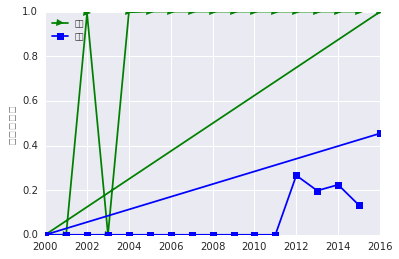

In [229]:
plotEvolution(u'情趣', 'g', '-', '>')
plotEvolution(u'生活', 'b', '-', 's')

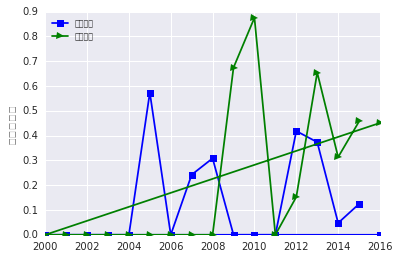

In [230]:
plotEvolution(u'情趣内衣', 'b', '-', 's')
plotEvolution(u'情趣用品', 'g', '-', '>')

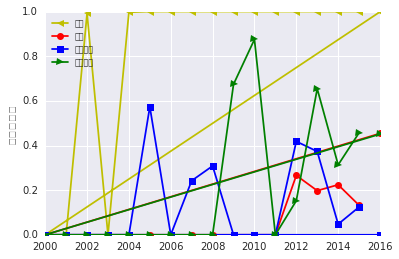

In [231]:
plotEvolution(u'情趣', 'y', '-', '<')
plotEvolution(u'生活', 'r', '-', 'o')
plotEvolution(u'情趣内衣', 'b', '-', 's')
plotEvolution(u'情趣用品', 'g', '-', '>')

### 情趣一词一直是高频重要词汇。生活是在11年之后比较多，情趣用品和情趣内衣差异比较大，分布不均。

In [233]:
import matplotlib.cm as cm

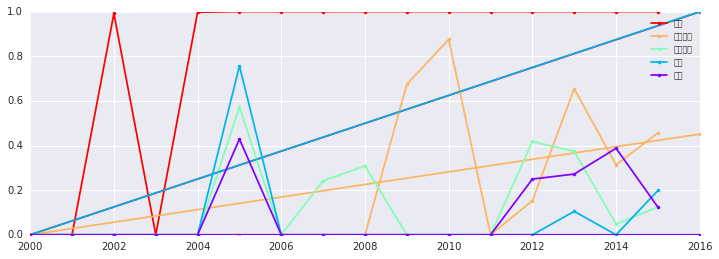

In [234]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in enumerate(top50[:5]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

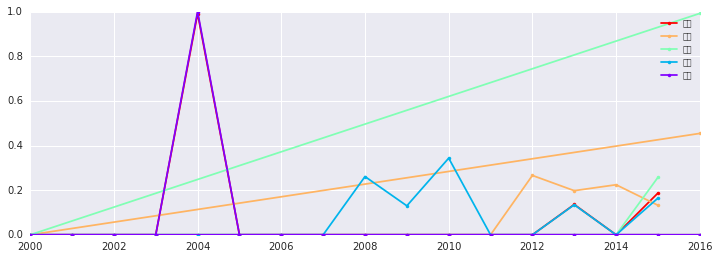

In [235]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in enumerate(top50[5:10]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

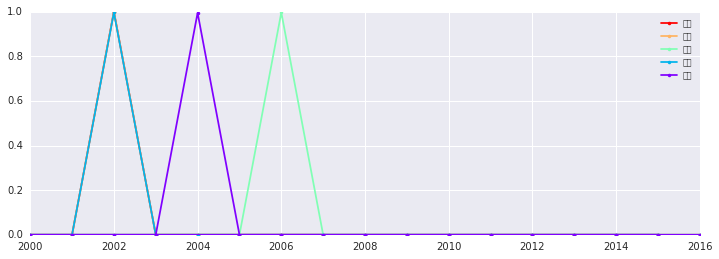

In [236]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[10:15]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

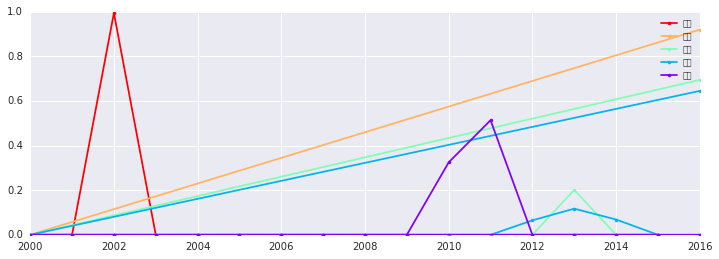

In [237]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[15:20]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

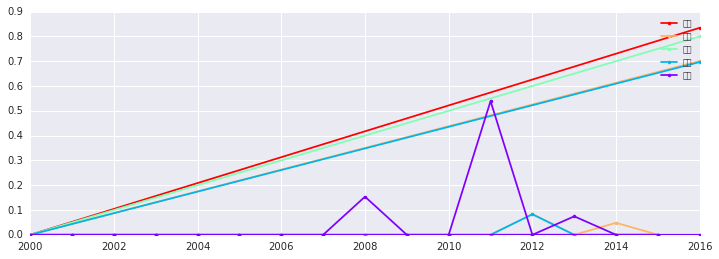

In [238]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[20:25]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

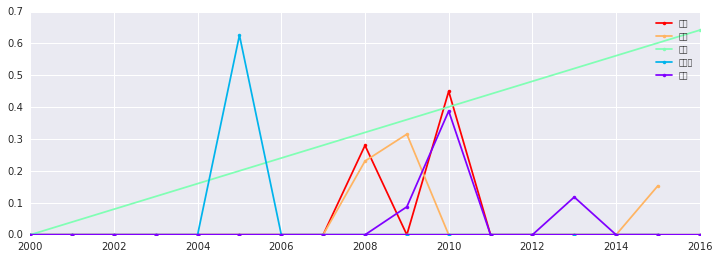

In [239]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[25:30]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

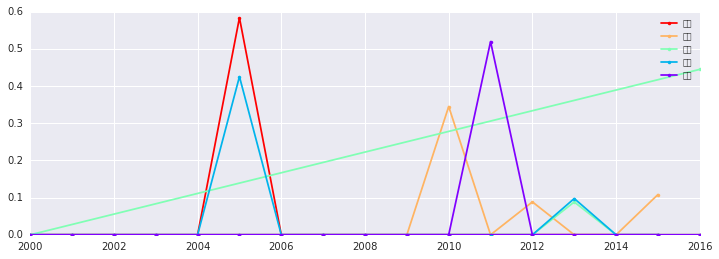

In [240]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[30:35]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

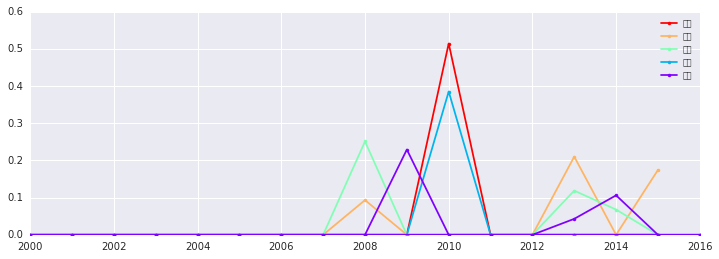

In [241]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[35:40]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

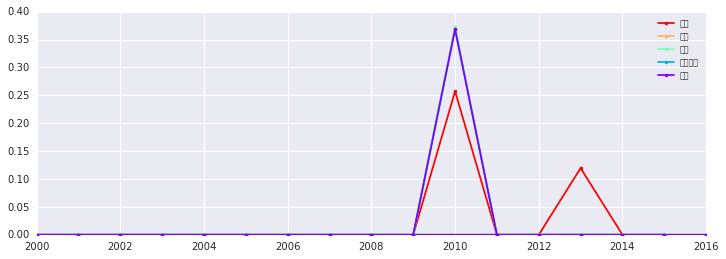

In [242]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[40:45]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

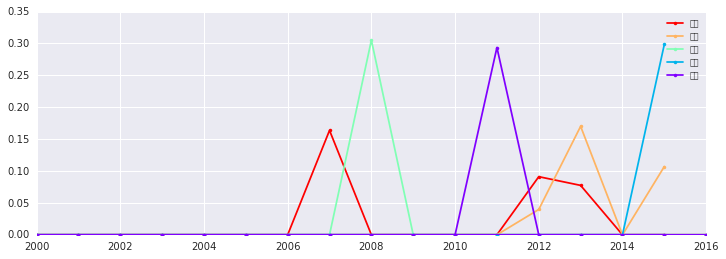

In [243]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in  enumerate(top50[45:50]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

In [279]:
import graphlab as gl
# set canvas to show sframes and sgraphs in ipython notebook
gl.canvas.set_target('ipynb')
import matplotlib.pyplot as plt
%matplotlib inline

A newer version of GraphLab Create (v1.10.1) is available! Your current version is v1.9.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [289]:
#-*- coding:utf-8 -*-

In [305]:
#train_file = 'http://s3.amazonaws.com/dato-datasets/millionsong/10000.txt'
train_file = '/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt'
sf = gl.SFrame.read_csv(train_file, header=False, delimiter='\t', verbose=False)
sf.rename({'X1':'title_id', 'X3':'user_id', 'X5':'clicknumber_ranking'}).show()

In [306]:
(train_set, test_set) = sf.random_split(0.8, seed=1)

In [307]:
popularity_model = gl.popularity_recommender.create(train_set, 'title_id', 'user_id', target = 'clicknumber_ranking')

Recsys training: model = popularity

Warning: Ignoring columns X2, X4, X6, X7;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 123 observations with 122 users and 118 items.

Data prepared in: 0.015095s

123 observations to process; with 118 unique items.

In [308]:
item_sim_model = gl.item_similarity_recommender.create(train_set, 'title_id', 'user_id', target = 'clicknumber_ranking', 
                                                       similarity_type='cosine')

Recsys training: model = item_similarity

Warning: Ignoring columns X2, X4, X6, X7;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 123 observations with 122 users and 118 items.

Data prepared in: 0.004745s

Computing item similarity statistics:

Computing most similar items for 118 items:

Finished training in 1.01307s

Finished prediction in 0.00228s

In [309]:
factorization_machine_model = gl.recommender.factorization_recommender.create(train_set, 'title_id', 'user_id', target = 'clicknumber_ranking')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 123 observations with 122 users and 118 items.

Data prepared in: 0.007455s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 123 / 123 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | 6.86638e+09                              |

| 1       | 4.16667           | 6.94318e+09                              |

| 2       | 2.08333           | 7.00846e+09                              |

| 3       | 1.04167           | 7.13454e+09                              |

+---------+-------------------+------------------------------------------+

| Final   | 8.33333           | 6.86638e+09                              |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 54us         | 7.18551e+09       | 84767.4               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 11.412ms     | 7.17311e+09       | 84694.2               | 8.33333     |

| 2       | 15.738ms     | 7.22841e+09       | 85020.1               | 8.33333     |

| 3       | 21.018ms     | 7.15185e+09       | 84568.6               | 8.33333     |

| 4       | 26.345ms     | 7.08216e+09       | 84155.6               | 8.33333     |

| 5       | 30.232ms     | 6.99968e+09       | 83664.1               | 8.33333     |

| 6       | 34.68ms      | 6.87891e+09       | 82939.2               | 8.33333     |

| 11      | 52.56ms      | 6.07709e+09       | 77955.7               | 8.33333     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.24109e+08

Final training RMSE: 11140.4

In [310]:
result = gl.recommender.util.compare_models(test_set, [popularity_model, item_sim_model, factorization_machine_model],
                                            user_sample=.1, skip_set=train_set)

compare_models: using 3 users to estimate model performance
PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 9696.827975326036)

Per User RMSE (best)
+---------------------------------------------+-------+---------------+
|                   title_id                  | count |      rmse     |
+-------------------------------------------

Finished prediction in 0.000644s

('\nOverall RMSE: ', 9885.835742785399)

Per User RMSE (best)
+----------------------------------------------------+-------+------+
|                      title_id                      | count | rmse |
+----------------------------------------------------+-------+------+
| 武汉医院首现"情趣病房" 作家张一一"第二洞房"试孕... |   1   | 93.0 |
+----------------------------------------------------+-------+------+
[1 rows x 3 columns]


Per User RMSE (worst)
+---------------------------------------------+-------+---------+
|                   title_id                  | count |   rmse  |
+---------------------------------------------+-------+---------+
| 你穿什么牌子的内衣裤,你是否喜欢情趣内衣?... |   1   | 17114.0 |
+---------------------------------------------+-------+---------+
[1 rows x 3 columns]


Per Item RMSE (best)
+-------------+-------+------+
|   user_id   | count | rmse |
+-------------+-------+------+
| 残酷月光115 |   1   | 93.0 |
+-------------+-------+------+
[1 rows x 3 columns]


Per Item RMSE (worst)
+------------

In [326]:
K = 10
users = gl.SArray(sf['title_id'].unique().head(100))

In [328]:
recs = item_sim_model.recommend(users=users, k=K)
recs.head()

title_id,user_id,score,rank
湛江警方有一手 深夜突袭娱乐场所查� ...,拎菜刀,938472.0,1
湛江警方有一手 深夜突袭娱乐场所查� ...,张楚楼,89462.0,2
湛江警方有一手 深夜突袭娱乐场所查� ...,哈士奇聪明不二,61463.0,3
湛江警方有一手 深夜突袭娱乐场所查� ...,sureden,46543.0,4
湛江警方有一手 深夜突袭娱乐场所查� ...,z_highhopes,40746.0,5
湛江警方有一手 深夜突袭娱乐场所查� ...,飘忽不定3,30617.0,6
湛江警方有一手 深夜突袭娱乐场所查� ...,小米妮Mini,29535.0,7
湛江警方有一手 深夜突袭娱乐场所查� ...,履带拖拉机,29363.0,8
湛江警方有一手 深夜突袭娱乐场所查� ...,Havalala,16710.0,9
湛江警方有一手 深夜突袭娱乐场所查� ...,苍山茶魔,15097.0,10
